<a href="https://colab.research.google.com/github/ravidas07/DeepLearning/blob/main/RegKaras1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Regression with Keras

### Step 1 - Data Ingestion

In [17]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd


In [18]:
df = pd.read_csv("https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv")
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


### Target - PE - Power Output in MegWatts
1. AT - Atmospheric Pressure in Degree Celisius
2. V - Vaccum Pressure of Boiler
3. AP - Atmospheric Pressure
4. RH - Relative Humidity in Percentage

### Step 2 - Basics Data Quality Checks

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [20]:
df.isna().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


In [21]:
df.duplicated().sum()

41

In [22]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)

In [23]:
X = df.drop(columns = ["PE"])
Y = df["PE"]

In [25]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [26]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


In [27]:
X.dtypes

,0
AT,float64
V,float64
AP,float64
RH,float64


In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [29]:
pre = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()

).set_output(transform="pandas")

In [30]:
X_pre = pre.fit_transform(X)

In [33]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size = 0.2, random_state = 42)

In [34]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6308,-1.501641,-1.244984,0.044260,-0.467246
8021,-1.465370,-1.418408,0.399466,-1.082031
9483,0.150695,0.648495,0.731104,-0.002393
4459,-0.036032,1.128565,-0.361449,1.586599


In [35]:
xtest.shape

(1906, 4)

In [37]:
from keras.models import Sequential
from keras.layers import Input, Dense

In [38]:
# Initialize neural network
model = Sequential()

# Add Input Layer
model.add(Dense(units=8, activation="relu"))

# Add Hidden Layer
model.add(Dense(units=8, activation="relu"))

# Add Output Layer
model.add(Dense(units=1, activation="linear"))

In [40]:
model.compile(loss= "mse", optimizer ="adam", metrics=["mae"])

In [41]:
hist = model.fit(xtrain, ytrain, epochs=100, validation_split=0.2)

Epoch 1/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 205161.7812 - mae: 452.6744 - val_loss: 198214.1406 - val_mae: 445.0269
Epoch 2/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 193494.5000 - mae: 439.6771 - val_loss: 166853.7344 - val_mae: 408.2037
Epoch 3/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 153559.2812 - mae: 390.7815 - val_loss: 105801.3672 - val_mae: 321.3317
Epoch 4/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 90724.0938 - mae: 293.5117 - val_loss: 49365.2188 - val_mae: 203.0470
Epoch 5/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41088.5312 - mae: 181.4778 - val_loss: 24179.1836 - val_mae: 132.6740
Epoch 6/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21764.1113 - mae: 125.7778 - val_loss: 16674.4414 - val_mae: 110.3976
Epoch 7/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15838.0947 - mae: 107.7201 - val_loss: 13289.5332 - val_mae: 98.4492
Epoch 8/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12262.6338 - mae:

In [42]:
import matplotlib.pyplot as plt

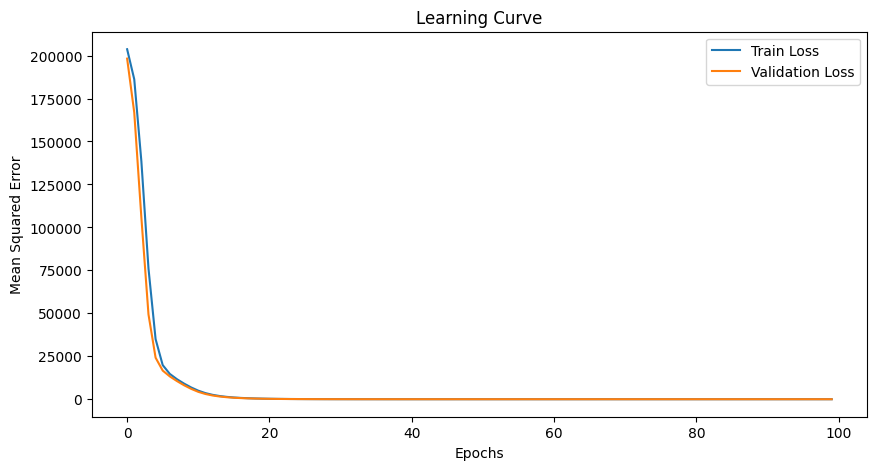

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Learning Curve")
plt.show()

### Evaluate Model

In [45]:
model.evaluate(xtrain, ytrain)

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19.3760 - mae: 3.4816


[19.543590545654297, 3.4687039852142334]

In [46]:
model.evaluate(xtest, ytest)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.3958 - mae: 3.4326


[19.601634979248047, 3.5061097145080566]

In [47]:
ypred_test = model.predict(xtest)
ypred_train = model.predict(xtrain)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [50]:
ypred_test[0:5]

array([[429.03568],
       [481.14496],
       [482.58902],
       [449.56525],
       [447.045  ]], dtype=float32)

In [51]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [52]:
from sklearn.metrics import r2_score

In [53]:
r2_score(ytrain, ypred_train)

0.9320045512508642

In [54]:
r2_score(ytest, ypred_test)

0.9350487102208285

In [55]:
### From above we can coclude it is a good model for out of sample prediction

In [56]:
xnew = pd.read_csv("https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv")

In [57]:
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [60]:
xnew_pre = pre.fit_transform(xnew)

In [61]:
xnew_pre

,AT,V,AP,RH
0,0.427011,0.406243,-0.567574,0.798624
1,1.326264,0.087032,-0.974534,-2.089095
2,1.186943,1.575060,-1.899298,0.850257
3,0.877341,0.685654,-0.306296,-0.032746
4,-1.026710,-1.056606,1.975528,-0.265470
...,...,...,...,...
95,0.970222,1.272093,-0.770262,-0.302885
96,-1.080186,-1.125646,-0.307880,0.631003
97,-1.947071,-1.010308,1.202779,0.874951
98,0.774610,1.719639,-0.801932,0.449164


In [68]:
preds = model.predict(xnew_pre)
preds.round(2)
preds[0:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[444.27408],
       [438.03818],
       [431.75473],
       [438.49973],
       [473.6309 ]], dtype=float32)

In [69]:
xnew["PE_Pred"] = preds

In [70]:
xnew

,AT,V,AP,RH,PE_Pred
0,22.49,58.82,1009.73,85.19,444.274078
1,28.88,54.89,1007.16,46.60,438.038177
2,27.89,73.21,1001.32,85.88,431.754730
3,25.69,62.26,1011.38,74.08,438.499725
4,12.16,40.81,1025.79,70.97,473.630890
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,435.565735
96,11.78,39.96,1011.37,82.95,472.129578
97,5.62,41.38,1020.91,86.21,484.429260
98,24.96,74.99,1008.25,80.52,435.340057


In [71]:
xnew.to_csv("ResultsPE.csv", index=False)

### Save the model object

In [72]:
model.save("PowerModel.keras")

In [73]:
from keras.models import load_model

In [74]:
m= load_model("PowerModel.keras")

In [76]:
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 365 (1.43 KB)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 244 (980.00 B)